In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df['label'].value_counts()

pomegranate    100
jute           100
chickpea       100
lentil         100
pigeonpeas     100
orange         100
banana         100
mothbeans      100
mungbean       100
papaya         100
maize          100
coconut        100
grapes         100
apple          100
watermelon     100
muskmelon      100
cotton         100
coffee         100
mango          100
rice           100
kidneybeans    100
blackgram      100
Name: label, dtype: int64

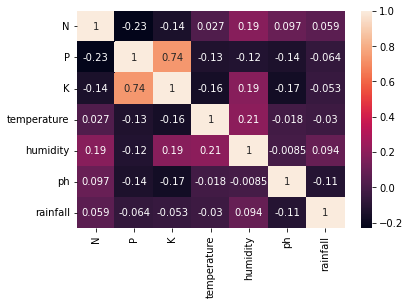

In [ ]:
sns.heatmap(df.corr(), annot= True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [ ]:
data = np.array([[120,18, 40, 23.603016, 70, 6.7, 140.91]])
prediction = DecisionTree.predict(data)
print(prediction)

['watermelon']


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = DecisionTree.predict(data)
print(prediction)

['jute']


In [ ]:
with open('/content/crop_pred.pkl','wb') as f:
  pickle.dump(DecisionTree,f)

In [ ]:
crop_model = pickle.load(open('/content/crop_pred.pkl','rb'))
crop_model.predict([[83, 45, 60, 28, 70.3, 7.0, 150.9]])

array(['jute'], dtype=object)